# Computer Science 315
## Assignment 3
### D.S. van der Westhuizen - 17158680

In [18]:
import pylab as pl
import numpy as np
from sklearn.decomposition import PCA
from sklearn.lda import LDA #Deprecation warning
from sklearn.linear_model import LogisticRegression as LRM #Deprecation warning
#import discriminant_analysis.LinearDiscriminantAnalysis as LDA
import copy
#rom logreg_skel import *
from utils import *
pl.style.use('bmh') #pretty plots

### Getting started: Question 1

In [19]:
wine_train_data = np.loadtxt("data/wine_train.txt", delimiter="," , usecols=range(0,13) )
wine_train_classes = np.loadtxt("data/wine_train.txt", delimiter="," , usecols=(13,) )
#print(wine_train_data)
print(wine_train_data.shape)
print(wine_train_classes)
print(wine_train_classes.shape)
wine_test_data = np.loadtxt("data/wine_test.txt", delimiter="," , usecols=range(0,13) )
wine_test_classes = np.loadtxt("data/wine_test.txt", delimiter="," , usecols=(13,) )
#print(wine_test_data)
print(wine_test_data.shape)
print(wine_test_classes)
print(wine_test_classes.shape)

(107, 13)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
(107,)
(71, 13)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
(71,)


In [20]:
wine_train_lda = LDA(n_components=2)
wine_train_lda_proj = wine_train_lda.fit(wine_train_data,wine_train_classes).transform(wine_train_data)
wine_test_lda = LDA(n_components=2)
wine_test_lda_proj = wine_test_lda.fit(wine_train_data,wine_train_classes).transform(wine_test_data)
#print(wine_train_lda_proj)
print(wine_train_lda_proj.shape)
#print(wine_train_pca_proj)
print(wine_test_lda_proj.shape)

(107, 2)
(71, 2)


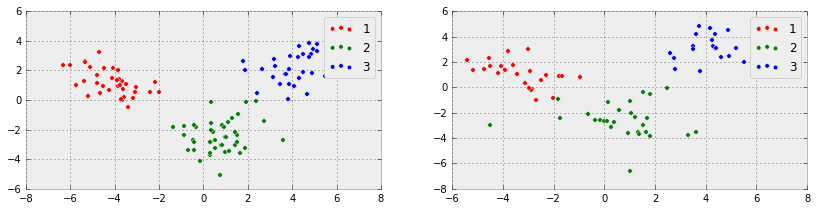

In [21]:
%matplotlib inline
classes = [1, 2, 3]



foograph2 = pl.figure(figsize=(14,7) )

foograph2_1 = foograph2.add_subplot(2, 2, 1)
foograph2_2 = foograph2.add_subplot(2, 2, 2)

for c, i, t in zip("rgb", range(1,4), classes):
    fooplot2_1 = foograph2_1.scatter(wine_train_lda_proj[wine_train_classes == i, 0],
                                     wine_train_lda_proj[wine_train_classes == i, 1], c=c, label=t)
foograph2_1.legend()

for c, i, t in zip("rgb", range(1,4), classes):
    fooplot2_2 = foograph2_2.scatter(wine_test_lda_proj[wine_test_classes == i, 0],
                                     wine_test_lda_proj[wine_test_classes == i, 1], c=c, label=t)
foograph2_2.legend()

In [22]:
wine_train_lda_proj_means = np.ndarray(shape=(3,2))
wine_train_lda_proj_means[0,0] = np.mean(wine_train_lda_proj[range(0,35),0], axis=0)
wine_train_lda_proj_means[1,0] = np.mean(wine_train_lda_proj[range(35,78),0], axis=0)
wine_train_lda_proj_means[2,0] = np.mean(wine_train_lda_proj[range(78,107),0], axis=0)
wine_train_lda_proj_means[0,1] = np.mean(wine_train_lda_proj[range(0,35),1], axis=0)
wine_train_lda_proj_means[1,1] = np.mean(wine_train_lda_proj[range(35,78),1], axis=0)
wine_train_lda_proj_means[2,1] = np.mean(wine_train_lda_proj[range(78,107),1], axis=0)
print(wine_train_lda_proj_means)

[[-4.14615574  1.2107625 ]
 [ 0.70115843 -2.44943162]
 [ 3.96433236  2.17065076]]


### Getting started: Question 2

In [23]:
foo = np.ndarray(shape=(3,2))
foo[0,0]=-5
foo[0,1]=2
foo[1,0]=0
foo[1,1]=-2
foo[2,0]=4
foo[2,1]=3
def nearest_centroid_classifier (sample, trained_data_class_means):
    return_value = np.arange(0,sample.shape[0],1)
    for j in range(0,sample.shape[0]):
        l = 0
        nearest = 1000000
        for i in range(0,3):
            x_diff = sample[j,0] - trained_data_class_means[i,0]
            y_diff = sample[j,1] - trained_data_class_means[i,1]
            diff = (x_diff ** 2) + (y_diff ** 2)
            if (diff < nearest):
                nearest = copy.copy(diff)
                return_value[j] = i+1
    return (return_value)

NCC = nearest_centroid_classifier(wine_test_lda_proj,wine_train_lda_proj_means)
print(NCC)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [24]:
print("Confusion Matrix:")
ConfMatrix1_2 = confusion(wine_test_classes, NCC)
print(ConfMatrix1_2)

Confusion Matrix:
      1.0 2.0 3.0 
1.0    24   0   0 
2.0     1  26   1 
3.0     0   0  19 
{(3.0, 3): 19, (2.0, 3): 1, (1.0, 1): 24, (2.0, 1): 1, (2.0, 2): 26}


### Getting started: Question 3

In [25]:
wine_LRM = LRM()
wine_LRM_prediction = wine_LRM.fit(wine_train_lda_proj,wine_train_classes).predict(wine_test_lda_proj)
print(wine_LRM_prediction.shape)
print(wine_LRM_prediction)

(71,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  3.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


In [26]:
print("Confusion Matrix:")
ConfMatrix1_3 = confusion(wine_test_classes, wine_LRM_prediction)
print(ConfMatrix1_3)

Confusion Matrix:
      1.0 2.0 3.0 
1.0    24   0   0 
2.0     0  27   1 
3.0     0   0  19 
{(3.0, 3.0): 19, (2.0, 3.0): 1, (1.0, 1.0): 24, (2.0, 2.0): 27}


### Getting started: Question 4

In [27]:
wine_LRM2 = LRM()
wine_LRM_prediction_full = wine_LRM2.fit(wine_train_data,wine_train_classes).predict(wine_test_data)
print(wine_LRM_prediction_full.shape)
print(wine_LRM_prediction_full)

(71,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


In [28]:
print("Confusion Matrix:")
ConfMatrix1_3 = confusion(wine_test_classes, wine_LRM_prediction_full)
print(ConfMatrix1_3)

Confusion Matrix:
      1.0 2.0 3.0 
1.0    24   0   0 
2.0     0  28   0 
3.0     0   0  19 
{(3.0, 3.0): 19, (1.0, 1.0): 24, (2.0, 2.0): 28}


### Decision Boundaries - Part I - Question 1

As seen at the top, class 2 and class 3 will be difficult to give a decision boundary.

### Decision Boundaries - Part I - Question 2 and 3

In [29]:
wine_train_lda_proj_class2and3 = wine_train_lda_proj[35:,:]
wine_train_lda_proj_class2and3_classes = wine_train_classes[35:]
wine_test_lda_proj_class2and3 = wine_test_lda_proj[24:,:]
wine_test_lda_proj_class2and3_classes = wine_test_classes[24:]
print(wine_train_lda_proj_class2and3_classes)
print(wine_test_lda_proj_class2and3_classes)

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


#### Training Set

In [30]:
wine_LRM23 = LRM()
wine_LRM_train_prediction23 = wine_LRM23.fit(wine_train_lda_proj_class2and3,
                                wine_train_lda_proj_class2and3_classes).predict(wine_train_lda_proj_class2and3)
print(wine_LRM_train_prediction23.shape)
print(wine_LRM_train_prediction23)

(72,)
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


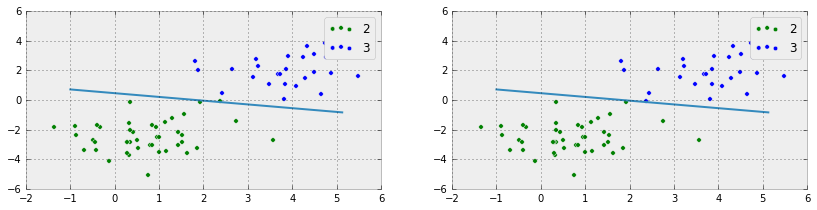

In [31]:
%matplotlib inline
classes34534 = [2, 3]
x = np.linspace(-1,6,8,False)
y = wine_LRM23.coef_[0,0]-x*(wine_LRM23.coef_[0,0]/wine_LRM23.coef_[0,1])
foograph34534 = pl.figure(figsize=(14,7) )

foograph34534_1 = foograph34534.add_subplot(2, 2, 1)
foograph34534_2 = foograph34534.add_subplot(2, 2, 2)

for c, i, t in zip("gb", range(2,4), classes34534):
    fooplot34534_1 = foograph34534_1.scatter(wine_train_lda_proj_class2and3[wine_train_lda_proj_class2and3_classes == i, 0],
                                     wine_train_lda_proj_class2and3[wine_train_lda_proj_class2and3_classes == i, 1], c=c, label=t)
foograph34534_1.plot(x,y);
foograph34534_1.legend()

for c, i, t in zip("gb", range(2,4), classes34534):
    fooplot34534_2 = foograph34534_2.scatter(wine_train_lda_proj_class2and3[wine_LRM_train_prediction23 == i, 0],
                                     wine_train_lda_proj_class2and3[wine_LRM_train_prediction23 == i, 1], c=c, label=t)
foograph34534_2.plot(x,y);
foograph34534_2.legend()

The predicted data is on the right. One green dot was misclassified as blue.

#### Test Set

In [32]:
wine_LRM23_2 = LRM()
wine_LRM_test_prediction23 = wine_LRM23_2.fit(wine_train_lda_proj_class2and3,
                                    wine_train_lda_proj_class2and3_classes).predict(wine_test_lda_proj_class2and3)
print(wine_LRM_test_prediction23.shape)
print(wine_LRM_test_prediction23)

(47,)
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


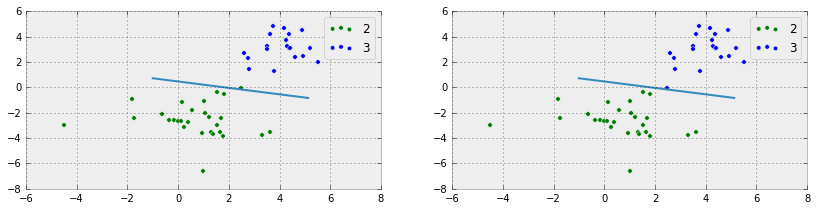

In [33]:
%matplotlib inline
classes69675 = [2, 3]
x = np.linspace(-1,6,8,False)
y = wine_LRM23_2.coef_[0,0]-x*(wine_LRM23_2.coef_[0,0]/wine_LRM23_2.coef_[0,1])
foograph69675 = pl.figure(figsize=(14,7) )

foograph69675_1 = foograph69675.add_subplot(2, 2, 1)
foograph69675_2 = foograph69675.add_subplot(2, 2, 2)

for c, i, t in zip("gb", range(2,4), classes69675):
    fooplot69675_1 = foograph69675_1.scatter(wine_test_lda_proj_class2and3[wine_test_lda_proj_class2and3_classes == i, 0],
                                     wine_test_lda_proj_class2and3[wine_test_lda_proj_class2and3_classes == i, 1], c=c, label=t)
foograph69675_1.plot(x,y);
foograph69675_1.legend()

for c, i, t in zip("gb", range(2,4), classes69675):
    fooplot34534_2 = foograph69675_2.scatter(wine_test_lda_proj_class2and3[wine_LRM_test_prediction23 == i, 0],
                                     wine_test_lda_proj_class2and3[wine_LRM_test_prediction23 == i, 1], c=c, label=t)
foograph69675_2.plot(x,y);
foograph69675_2.legend()

A single green dot was misclassified as blue

### Decision Boundaries - Part I - Question 4

In [34]:
#foo = logis_reg(wine_train_lda_proj_class2and3,wine_train_lda_proj_class2and3_classes)

### Decision Boundaries - Part 2 - Question 1

(71,)
(250, 239)


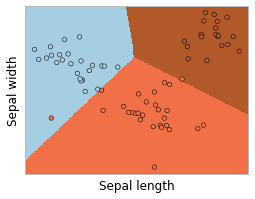

In [35]:
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
X = wine_test_lda_proj
Y = wine_test_classes
h = 0.05
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z  = nearest_centroid_classifier(np.c_[xx.ravel(), yy.ravel()],wine_train_lda_proj_means)

print(NCC.shape)
print(xx.shape)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Decision Boundaries - Part 2 - Question 2

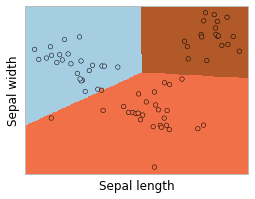

In [36]:
#http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
wine_LRM = LRM()
wine_LRM_prediction = wine_LRM.fit(wine_test_lda_proj,wine_test_classes)
X = wine_test_lda_proj
Y = wine_test_classes
h = 0.05
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z  = wine_LRM.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Test code, ignore:

In [37]:
foo = np.array([1,2,4,5])
print(np.gradient(foo))
print(foo.shape)

[ 1.   1.5  1.5  1. ]
(4,)


In [38]:
wine_train_lda_proj_class2and3.shape

(72, 2)

In [39]:
bias = np.ones((72,1))
data = np.hstack((bias, wine_train_lda_proj_class2and3))   
np.zeros(2)
np.linalg.solve(np.gradient(np.zeros(2)))

TypeError: solve() missing 1 required positional argument: 'b'

In [ ]:
d=2
H = np.ndarray(shape=(d+1,d+1))
for q1 in range (0,d+1):
    for q2 in range(0,d+1):
        H[q1,q2] = 2
H